# Analisis Peningkatan Kasus Positif COVID - 19

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


%matplotlib inline

plt.style.use("ggplot")

In [3]:
pd.__version__

'1.1.2'

In [4]:
df = pd.read_csv('new_cases.csv')
df = df.fillna(0)

# Merubah Format tanggal
df['date'] = pd.to_datetime(df['date'])
df['date'] = df.loc[:,'date'].apply(lambda x:x.strftime('%d %b %Y'))

In [5]:
# Mengubah Data yang masih Float menjadi Bilangan Bulat
for i in df.columns:
    try:
        df.loc[:,i] = df.loc[:,i].apply(lambda x : int(x))
    except:
        None

In [6]:
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,31 Dec 2019,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01 Jan 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02 Jan 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03 Jan 2020,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,04 Jan 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,16 Aug 2020,259406,120,143,469,0,37,0,0,6365,...,0,13,693,0,1226,4,0,4,165,104
230,17 Aug 2020,232053,45,120,450,0,27,0,0,6663,...,7,6,0,0,1148,30,0,7,157,85
231,18 Aug 2020,196921,3,119,442,16,27,0,0,5469,...,55,17,1156,0,1047,19,0,13,496,47
232,19 Aug 2020,254307,0,155,419,0,60,0,0,4557,...,0,28,660,0,895,6,0,4,142,70


In [7]:
# Membuat Index Hari Ke -
df['Hari ke'] = df.index + 1

In [8]:
# Mempersimple tabel

tabel = df[['date','Hari ke','World']].copy()
tabel['Jumlah'] = 0

# Menambah Kolom Jumlah

for i in range(0,len(tabel)):
    if i == 0:
        tabel.loc[i,'Jumlah'] = tabel.loc[i,'World']
    else:
        tabel.loc[i,'Jumlah'] = tabel.loc[i-1,'Jumlah'] + tabel.loc[i,'World']

In [9]:
tabel

,date,Hari ke,World,Jumlah
0,31 Dec 2019,1,27,27
1,01 Jan 2020,2,0,27
2,02 Jan 2020,3,0,27
3,03 Jan 2020,4,17,44
4,04 Jan 2020,5,0,44
...,...,...,...,...
229,16 Aug 2020,230,259406,21475253
230,17 Aug 2020,231,232053,21707306
231,18 Aug 2020,232,196921,21904227
232,19 Aug 2020,233,254307,22158534


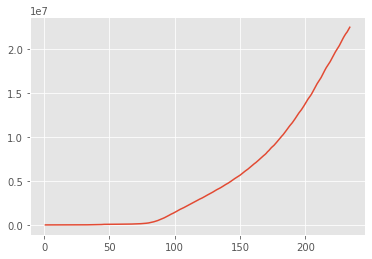

In [10]:
#plt.ylim(0,max(tabel["Jumlah"]))
plt.plot(tabel["Hari ke"],tabel["Jumlah"])

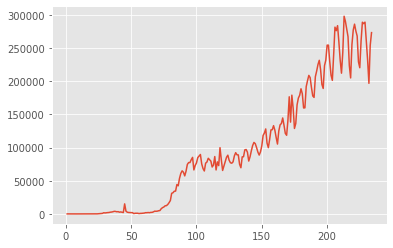

In [9]:
plt.plot(tabel["Hari ke"],tabel["World"])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

svm = SVR(kernel='poly',gamma=0.1,epsilon=0.01,C=0.01,shrinking=False)

x_train,x_test,y_train,y_test = train_test_split(tabel[["Hari ke"]],tabel["Jumlah"],test_size=0.25)
svm.fit(x_train,y_train)
svm.score(x_test,y_test)


0.9989889510351826

In [11]:
svm_tambah = SVR(kernel='poly',gamma=0.1,epsilon=0.01,C=0.01,shrinking=False)

x_train,x_test,y_train,y_test = train_test_split(tabel[["Hari ke"]],tabel["World"],test_size=0.25)
svm_tambah.fit(x_train,y_train)
svm_tambah.score(x_test,y_test)

0.8034767895359356

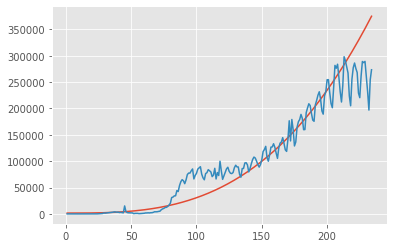

In [12]:
plt.plot(tabel[["Hari ke"]],svm_tambah.predict(tabel[["Hari ke"]]))
plt.plot(tabel[["Hari ke"]],tabel["World"])

# Prediksi Jumlah Kasus Positif Pada Hari ke

In [13]:
hari_ke = 300
tanggal = (pd.to_datetime(tabel['date'][0])+timedelta(hari_ke)).strftime("%d %b %Y")
kasus_positif = int(svm.predict([[hari_ke]])[0])

print("Pada Tanggal",tanggal,"jumlah Kasus Positif di Dunia :",kasus_positif)

Pada Tanggal 26 Oct 2020 jumlah Kasus Positif di Dunia : 47146295


# Grafik Kenaikan kasus Positif Prediksi dan Realita

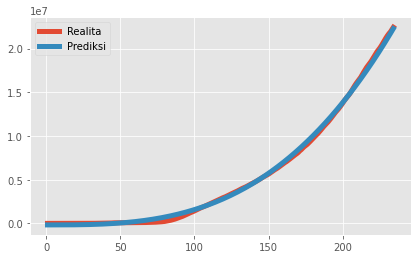

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2)

fig.set_size_inches(15,4)

ax1.plot(tabel["Hari ke"],tabel["Jumlah"],label="Realita",lw = 5)
ax1.plot(tabel[["Hari ke"]],svm.predict(tabel[["Hari ke"]]),label="Prediksi",ls='-',lw = 5)

ax2.remove()
ax1.legend()

In [15]:
def buat_model(wilayah):
    # Mempersimple tabel
    tabel = df[['date','Hari ke',wilayah]].copy()
    #tabel.set_index("Hari ke",inplace=True)
    tabel['Jumlah'] = 0

    # Menambah Kolom Jumlah
    for i in range(0,len(df)):
        if i == 0:
            tabel.loc[i,'Jumlah'] = tabel.loc[i,wilayah]
        else:
            tabel.loc[i,'Jumlah'] = tabel.loc[i-1,'Jumlah'] + tabel.loc[i,wilayah]
        
    # Model Machine Learning
    svm = SVR(kernel='poly',gamma=0.1,epsilon=0.01,C=0.01,shrinking=False)

    x_train,x_test,y_train,y_test = train_test_split(tabel[["Hari ke"]],tabel["Jumlah"],test_size=0.25)
    svm.fit(x_train,y_train)
    print(svm.score(x_test,y_test))
    
    # Simpan Model
    joblib.dump(svm,f"model/model_{wilayah}.joblib")
    
    return svm

In [16]:
def grafik_model(wilayah):
    # Grafik
    model = joblib.load(f"model/model_{wilayah}.joblib")
    
    fig,(ax1,ax2) = plt.subplots(1,2)

    fig.set_size_inches(15,4)
    
    ax1.set_title("Realita")
    ax2.set_title("Prediksi")
    ax1.plot(tabel["Hari ke"],tabel["Jumlah"],label="Realita",lw = 5)
    ax2.plot(tabel["Hari ke"],model.predict(tabel[["Hari ke"]]),label="Prediksi",ls='-',lw = 5)

    ax1.legend()
    ax2.legend()

In [17]:
buat_model("Indonesia")

0.9808240686395924


SVR(C=0.01, epsilon=0.01, gamma=0.1, kernel='poly', shrinking=False)

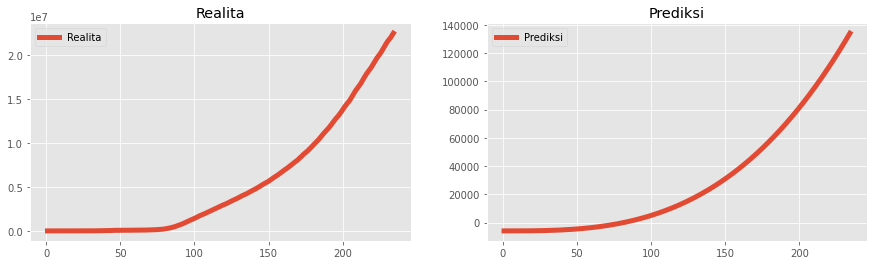

In [18]:
grafik_model("Indonesia")

## Objek Oriented

In [39]:
class Model:
    
    def __init__(self,negara='World',model ='svm'):
        self.negara = negara
        self.model = model.lower()
        self.df = pd.read_csv('new_cases.csv')
        
        
        self.df = self.df.fillna(0)
        # Merubah Format tanggal
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df['date'] = self.df.loc[:,'date'].apply(lambda x:x.strftime('%d %b %Y'))
        
        # Mengubah Data yang masih Float menjadi Bilangan Bulat
        for i in self.df.columns:
            try:
                self.df.loc[:,i] = self.df.loc[:,i].apply(lambda x : int(x))
            except:
                None
                
        # Membuat Index Hari Ke -
        self.df['Hari ke'] = self.df.index + 1
                
        

    def buat_model(self,panjang=0):
        # Mempersimple tabel
        self.tabel = self.df[['date','Hari ke',self.negara]].copy()
        
        self.tabel['Jumlah'] = 0

        # Menambah Kolom Jumlah
        for i in range(0,len(self.tabel)):
            if i == 0:
                self.tabel.loc[i,'Jumlah'] = self.tabel.loc[i,self.negara]
            else:
                self.tabel.loc[i,'Jumlah'] = self.tabel.loc[i-1,'Jumlah'] + self.tabel.loc[i,self.negara]
        
        
        
        # Menghilangkan outliner
        filt = self.tabel['Jumlah']>=100
        self.tabel = self.tabel.loc[filt]
        
        #Mengcopy tabel untuk proses penilaian
        self.tabel2 = self.tabel.copy()
        
        try:
            os.mkdir('tabel')
        except:
            pass
        
        joblib.dump(self.tabel2,f'tabel/tabel_filter_{self.negara}.joblib')
        
        if panjang==0:
            self.tabel = self.tabel.iloc[0:len(self.tabel)+1]
        else :
            self.tabel = self.tabel.iloc[0:panjang+1]
            
        self.tabel.reset_index(inplace=True) # mereset index
                
        
        # Model Machine Learning
        
        if self.model == 'svm':
            model = SVR(kernel='poly')
            
        elif self.model == 'linear':
            model = LinearRegression()
            
        elif self.model == 'log':
            model = LogisticRegression()
            
        elif self.model == 'gaussian':
            model = GaussianProcessRegressor()
            
        elif self.model == 'randomforest':
            model = RandomForestRegressor()

        elif self.model == 'decisiontree':
            model = DecisionTreeRegressor()
            
        elif self.model == 'polinomial':
            model = make_pipeline(PolynomialFeatures(3),LinearRegression())
            
        else:
            pesan = "Model Tidak ada di pilihan, hanya tersedia: svm,linear,log,gaussian,randomforest,decision tree,polinomial"
            raise TypeError(pesan)

        x_train,x_test,y_train,y_test = train_test_split(self.tabel[["Hari ke"]],self.tabel["Jumlah"],test_size=0.25)
        model.fit(x_train,y_train)
    
        # Simpan Model
        try:
            os.mkdir('model')
        except:
            pass
        
        joblib.dump(model,f"model/model_{self.negara}_{self.model}.joblib")
        
        #print(r2_score(self.tabel2['Jumlah'],model.predict(self.tabel2[["Hari ke"]])))
        
        return r2_score(self.tabel2['Jumlah'],model.predict(self.tabel2[["Hari ke"]]))

        
        
    def buat_grafik_prediksi_realita(self,skala='log'):
        model = joblib.load(f"model/model_{self.negara}_{self.model}.joblib")
        
        fig,ax = plt.subplots()
        ax.clear()
        fig.set_size_inches(6,4)
        
        ax.set_title("Realita & Prediksi Total Kasus Positif")
        ax.set_yscale(skala)
       
        ax.plot(self.tabel2["Hari ke"],self.tabel2["Jumlah"],label="Realita",lw = 5,alpha=0.4)
        ax.plot(self.tabel2[["Hari ke"]],model.predict(self.tabel2[["Hari ke"]]),label="Prediksi",ls='-',lw = 5,alpha=0.4)

        
        ax.legend()
        
        try :
            os.mkdir('Grafik')
        except:
            pass
        
        plt.savefig(f'Grafik/grafik_total_{self.negara}_{self.model}',bbox_inches="tight")
        
        print(r2_score(self.tabel2['Jumlah'],model.predict(self.tabel2[["Hari ke"]])))
            
    def buat_grafik_realita(self,skala='log'):
        model = joblib.load(f"model/model_{self.negara}_{self.model}.joblib")
        
        fig,ax = plt.subplots()
        ax.clear()
        fig.set_size_inches(6,4)
        
        ax.set_title("Grafik Realita")
        ax.set_yscale(skala)
       
        ax.plot(self.tabel2["Hari ke"],self.tabel2["Jumlah"],label="Realita",lw = 5,alpha=0.4)
        
        
        ax.legend()
        
        
    @property
    def export_model(self):
        model = joblib.load(f"model/model_{self.negara}_{self.model}.joblib")
        return model

    @property
    def export_tabel(self):
        tabel = joblib.load(f'tabel/tabel_filter_{self.negara}.joblib')
        return tabel
    
    def buat_skor_per_banyak_hari(self):
        
        # dictionary untuk menyimpan hasil skor
        skorHari = {
        "Hari":[], # Banyak Hari yang diinput
        "Skor":[] # skor berdasarkan banyak hari yang diinput
        }
    
        if self.model == 'log':
            k = 2 # model logaritma butuh minimal 2 input
            
        else:
            k = 1
            
            
        for i in range(k,len(self.export_tabel)+1): # 
    
            skorHari['Hari'].append(i)
            skorHari['Skor'].append(self.buat_model(i))

        tabel_skor = pd.DataFrame(skorHari)
    
        # Coba buat folder Export
        try:
            os.mkdir('Export')
        except:
            pass
        
        #Export hasil dalam bentuk CSV
        
        tabel_skor.to_csv(f'Export/tabel_skor_{self.negara}_{self.model}.csv',index=False)

    def buat_grafik_skor_per_banyak_hari(self):
        
        #Ambil data tabel skor
        tabel_skor = pd.read_csv(f'Export/tabel_skor_{self.negara}_{self.model}.csv')
        plt.cla()
        plt.ylim([-0.5,1.2])
        plt.title(f"Grafik Skor $R^2$ Berdasarkan Banyak Input Data\n Negara: {self.negara}\n Model : {self.model} ")
        plt.plot(tabel_skor['Hari'],tabel_skor['Skor'])
        
        try :
            os.mkdir('Grafik')
        except:
            pass
        
        plt.savefig(f'Grafik/grafik_skor_{self.negara}_{self.model}',bbox_inches="tight")
        
    @property
    def skor_stabil(self,skor_stabil=0.8):
        
        #Ambil data tabel skor
        tabel_skor = pd.read_csv(f'Export/tabel_skor_{self.negara}_{self.model}.csv',index_col='Hari')
        
        filt = tabel_skor['Skor'] >=skor_stabil
        
        
        return tabel_skor[filt]
    
    def prediksi_hari_ke(self,hari_ke):
        
        #Import model
        model = joblib.load(f"model/model_{self.negara}_{self.model}.joblib")
        
        tanggal = (pd.to_datetime(self.tabel['date'][0])+timedelta(hari_ke)).strftime("%d %b %Y")
        banyak_kasus_positif = int(model.predict([[hari_ke]])[0])

        print("Pada Tanggal",tanggal,f"jumlah Kasus Positif di {self.negara} :",banyak_kasus_positif)
        
    @property
    def ambil_semua_skor_stabil(self,skor_stabil =0.8):
        svm = pd.read_csv(f'Export/tabel_skor_{self.negara}_svm.csv')
        polinomial = pd.read_csv(f'Export/tabel_skor_{self.negara}_polinomial.csv')
        
        
        panjang_svm = len(svm.loc[svm['Skor']>=skor_stabil])
        panjang_polinomial = len(polinomial.loc[polinomial['Skor']>=skor_stabil])
      
        
        
        return panjang_svm,panjang_polinomial
    
    def buat_semua_skor_per_banyak_hari(self):
        semua_model = ['svm','polinomial']

        for negara in self.df.columns:
            for model in semua_model:
                try:
                    negara_model = Model(negara,model)
                    negara_model.buat_model()
                    negara_model.buat_skor_per_banyak_hari()
                    negara_model.buat_grafik_skor_per_banyak_hari()
                except Exception as e:
                    print(e)
                
    def cari_model_terbaik(self):
        model_terbaik ={
            'svm':0,
            'polinomial':0,
            
        }
        panjang = 0
        
        for negara in self.df.columns:
            negara_model = Model(negara)
            try:
                
                
                panjang_svm,panjang_polinomial = negara_model.ambil_semua_skor_stabil

                if panjang_svm>panjang_polinomial:
                    model_terbaik['svm'] += 1

                elif panjang_polinomial>panjang_svm:
                    model_terbaik['polinomial'] += 1
                    
                elif panjang_polinomial==panjang_svm:
                    model_terbaik['polinomial'] += 1
                    model_terbaik['svm'] += 1
                    
                panjang += 1
                
            except:
                pass
            
        
        print(model_terbaik)
        print('Banyak Negara/Wilayah yang memiliki skor stabil :',panjang," Negara/Wilayah")
        
#         tabel_model_terbaik = pd.DataFrame(model_terbaik)
#         tabel_model_terbaik.to_csv('model_terbaik/model_terbaik.csv')
        
#         return tabel_model_terbaik

In [40]:
indonesia = Model('Indonesia','svm')

In [30]:
indonesia.buat_model(40)

0.9780647335884608

In [31]:
indonesia.export_tabel

,date,Hari ke,Indonesia,Jumlah
76,16 Mar 2020,77,21,117
77,17 Mar 2020,78,17,134
78,18 Mar 2020,79,38,172
79,19 Mar 2020,80,0,172
80,20 Mar 2020,81,55,227
...,...,...,...,...
229,16 Aug 2020,230,2345,137468
230,17 Aug 2020,231,2081,139549
231,18 Aug 2020,232,1821,141370
232,19 Aug 2020,233,1673,143043


0.9780647335884608


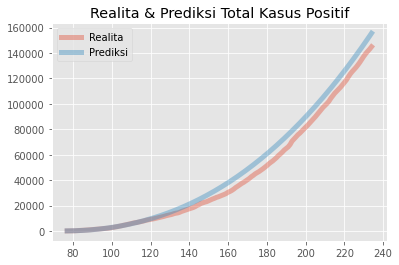

In [32]:
indonesia.buat_grafik_prediksi_realita('linear')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

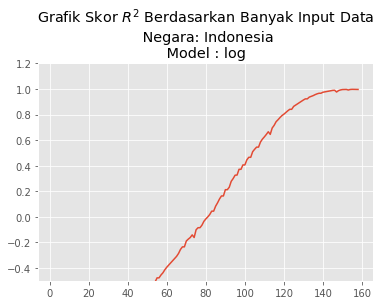

In [27]:
indonesia = Model("Indonesia",'log')
indonesia.buat_skor_per_banyak_hari()
indonesia.buat_grafik_skor_per_banyak_hari()

In [22]:
log = LogisticRegression()
a = np.array([1,2,3,4,5]).reshape(-1,1)
b = np.array([2,4,6,8,0])
log.fit(a,b)

LogisticRegression()

In [23]:
log.predict(a)

array([2, 2, 6, 0, 0])

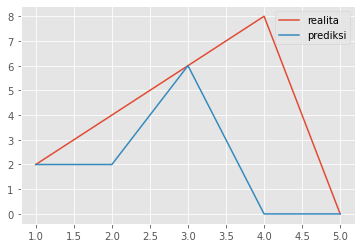

In [24]:
plt.plot(a,b,label="realita")
plt.plot(a,log.predict(a),label="prediksi")
plt.legend()

In [25]:
print(r2_score(a,log.predict(a)))

-4.1


Incompatible indexer with Series
Incompatible indexer with Series
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of

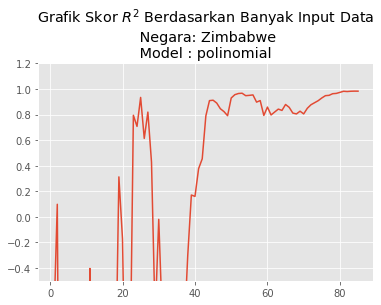

In [41]:
indonesia.buat_semua_skor_per_banyak_hari()

In [38]:
indonesia.cari_model_terbaik()

{'svm': 66, 'polinomial': 82, 'gaussian': 0}
Banyak Negara/Wilayah yang memiliki skor stabil : 132  Negara/Wilayah
